![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desasrrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de precios de vehículos usados".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/t/b8be43cf89c540bfaf3831f2c8506614).

## Datos para la predicción de precios de vehículos usados

En este proyecto se usará el conjunto de datos de Car Listings de Kaggle, donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como: año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

## Rúbrica de Calificación

La calificación estará distribuida de la siguiente manera: 

**Competencia (20 puntos)**

Para cada grupo la calificación será proporcional al lugar que ocupe en el ranking de la competencia. Los grupos que ocupen los primeros 5 puestos obtendrán 20 puntos, a los siguientes 5 grupos se le restarán 2 puntos y así sucesivamente. Es decir: posiciones del 1 al 5 obtendrán 20 puntos, posiciones del 6 al 10 obtendrán 18 puntos, posiciones del 11 a 15 obtendrán 16 puntos y así sucesivamente.

**Informe (80 puntos)**

La calificación del informe se realizará con base en los siguientes criterios (recuerden que deben dar cuenta de cada uno de los aspectos mencionados en los criterios por medio de pantallazos o fracciones de código):

<ins>Preprocesamiento de datos (10 puntos)</ins>

* Los datos de entrenamiento se dividen en datos de entrenamiento y validación. Si decidieron preprocesar los datos (estandarizar, normalizar, imputar valores, etc), estos son correctamente preprocesados al ajustar sobre los datos de entrenamiento (.fit_transform()) y al transformar los datos del set de validación (.transform()). (10 puntos)

<ins>Calibración del modelo (15 puntos)</ins>

* Se calibran los parámetros que se consideren pertinentes del modelo de clasificación seleccionado. (5 puntos)

* Se justifica el método seleccionado de calibración. (5 puntos)

* Se analizan los valores calibrados de cada parámetro y se explica cómo afectan el modelo. (5 puntos)

<ins>Entrenamiento del modelo (15 puntos)</ins>

* Se entrena el modelo de regresión escogido con los datos del set de entrenamiento preprocesados y los parámetros óptimos. (5 puntos)

* Se presenta el desempeño del modelo en los datos de validación con al menos una métrica de desempeño. (5 puntos)

* Se justifica la selección del modelo correctamente. (5 puntos)

<ins>Disponibilización del modelo (30 puntos)</ins>

* Se disponibiliza el modelo en una API alojada en un servicio en la nube. (20 puntos)

* Se hacen las predicciones sobre el valor del automóvil en al menos dos observaciones del set de validación. (10 puntos)

<ins>Conclusiones (10 puntos)</ins>

* Se presentan conclusiones claras y concisas sobre el desarrollo y los resultados del proyecto. (10 puntos)

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# import all what you need for machine learning
import sklearn
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn import ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn import neighbors

from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
import multiprocessing
import math
from statistics import mean
import joblib
import os
os.chdir('..')

# Global settings
n_jobs = -1 # This parameter conrols the parallel processing. -1 means using all processors.
random_state = 42 # This parameter controls the randomness of the data. Using some int value to get same results everytime this code is run.

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('C:/Users/ElkinDavidPeñaRuiz/OneDrive - CARBOMAX DE COLOMBIA S.A.S/PERSONALES/MIAD/CICLO 4/Machine Learning y PLN/MIAD_UNIANDES/Data/dataTrain_carListings.csv')
dataTesting = pd.read_csv('C:/Users/ElkinDavidPeñaRuiz/OneDrive - CARBOMAX DE COLOMBIA S.A.S/PERSONALES/MIAD/CICLO 4/Machine Learning y PLN/MIAD_UNIANDES/Data/dataTest_carListings.csv', index_col=0)
data = dataTraining
test = dataTesting

## Análisis Exploratorio de Datos

In [4]:
# Visualización datos de entrenamiento
data.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    400000 non-null  int64 
 1   Year     400000 non-null  int64 
 2   Mileage  400000 non-null  int64 
 3   State    400000 non-null  object
 4   Make     400000 non-null  object
 5   Model    400000 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.3+ MB


In [6]:
categorical_cols=data.select_dtypes(include=['object']).columns
categorical_cols

Index(['State', 'Make', 'Model'], dtype='object')

In [7]:
numerical_cols=data.select_dtypes(exclude=['object']).columns
numerical_cols

Index(['Price', 'Year', 'Mileage'], dtype='object')

In [8]:
data.describe()

,Price,Year,Mileage
count,400000.000000,400000.000000,4.000000e+05
mean,21146.919312,2013.198125,5.507296e+04
std,10753.664940,3.292326,4.088102e+04
min,5001.000000,1997.000000,5.000000e+00
25%,13499.000000,2012.000000,2.584100e+04
50%,18450.000000,2014.000000,4.295500e+04
75%,26999.000000,2016.000000,7.743300e+04
max,79999.000000,2018.000000,2.457832e+06


In [9]:
df=pd.DataFrame(data['Make'].value_counts()).reset_index().rename(columns={'index':'make','Make': 'count'})

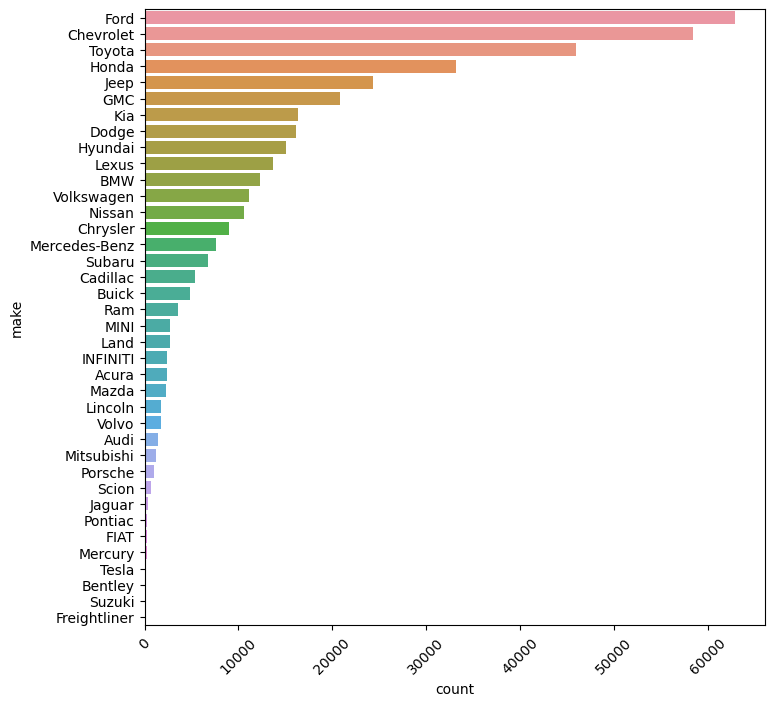

In [10]:
# Cantidad de carros por marca
plt.figure(figsize=(8,8))
plot = sns.barplot(y='make',x='count',data=df)
plot=plt.setp(plot.get_xticklabels(), rotation=45)



In [11]:
# Make10 = data['Make'].value_counts().sort_values(ascending=False).head(3).index.tolist()
# Make10

In [12]:
df2=pd.DataFrame(data['State'].value_counts()).reset_index().rename(columns={'index':'state','State': 'count'})

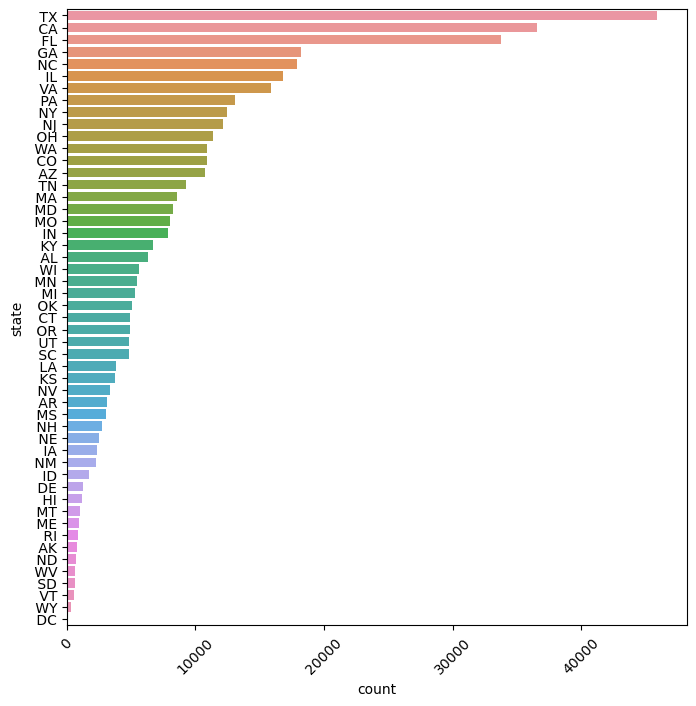

In [13]:
# Cantidad de carros por state
plt.figure(figsize=(8,8))
plot = sns.barplot(y='state',x='count',data=df2)
plot=plt.setp(plot.get_xticklabels(), rotation=45)

In [14]:
# State10 = data['State'].value_counts().sort_values(ascending=False).head(3).index.tolist()
# State10

<AxesSubplot:xlabel='Price', ylabel='Density'>

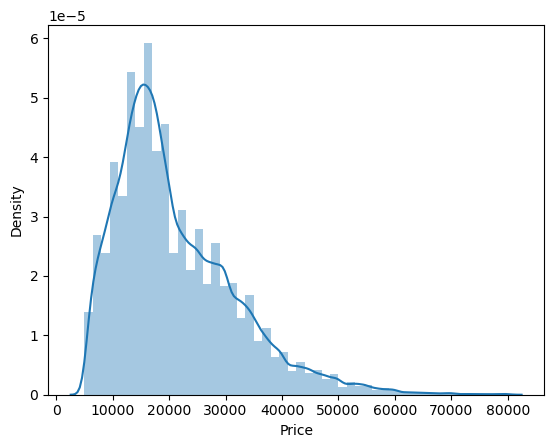

In [15]:
# Distribución del Precio de los carros
sns.distplot(data['Price'],kde=True)

### Variables Dummy

In [16]:
# dummies_data = pd.get_dummies(data['Make'])
# dummies_test = pd.get_dummies(test['Make'])

# dummies_data_s = pd.get_dummies(data['State'])
# dummies_test_s = pd.get_dummies(test['State'])

In [17]:
# first = dummies_data.columns.tolist()
# second = dummies_test.columns.tolist()
# cols = set(first).intersection(second)
# cols = set(cols).intersection(Make10)

# data = pd.concat([data, dummies_data[cols]], axis=1)
# test = pd.concat([test, dummies_test[cols]], axis=1)

# first = dummies_data_s.columns.tolist()
# second = dummies_test_s.columns.tolist()
# cols = set(first).intersection(second)
# cols = set(cols).intersection(State10)

# data = pd.concat([data, dummies_data_s[cols]], axis=1)
# test = pd.concat([test, dummies_test_s[cols]], axis=1)

In [18]:
# Codificación de las variables categoricas
data['State'] = pd.factorize(data.State)[0]
data['Model'] = pd.factorize(data.Model)[0]
data['Make'] = pd.factorize(data.Make)[0]

test['State'] = pd.factorize(test.State)[0]
test['Model'] = pd.factorize(test.Model)[0]
test['Make'] = pd.factorize(test.Make)[0]

In [19]:
# # df = data[['Price','Mileage','Year']]
# df = data
# filas = math.ceil(len(df.columns) / 3)
# fig, a = plt.subplots(filas,3,figsize=(20, 10))

# a = a.ravel()
# titles = df.columns

# for i, ax in enumerate(a):
    
#     if i < len(df.columns):
#         ax.hist(df.iloc[:,i])
#         ax.set_title(titles[i])
# plt.tight_layout()

In [20]:
# # df = data[['Price','Mileage','Year']]
# df = data
# filas = math.ceil(len(df.columns) / 3)
# fig, a = plt.subplots(filas,3,figsize=(20, 10))

# a = a.ravel()
# titles = df.columns

# for i, ax in enumerate(a):
    
#     if i < len(df.columns):
#         ax.boxplot(df.iloc[:,i])
#         ax.set_title(titles[i])
# plt.tight_layout()

In [21]:
# print('Cantidad Datos:',len(data))

# # Control de Outliers
# Q1 = data['Price'].quantile(0.25)
# print('Primer Cuartil:', Q1)

# Q3 = data['Price'].quantile(0.75)
# print('Tercer Cuartil:', Q3)

# IQR = Q3 - Q1
# print('Rango Intercuartil:', IQR)

# Mediana = data['Price'].median()
# print('Mediana:', Mediana)

# Valor_Minimo = data['Price'].min()
# print('Valor Mínimo:', Valor_Minimo)

# Valor_Maximo = data['Price'].max()
# print('Valor Máximo:', Valor_Maximo)

# BI_Calculado = (Q1 - 1.5 * IQR)
# print('BI_Calculado: \n', BI_Calculado)

# BS_Calculado = (Q3 + 1.5 * IQR)
# print('BS_Calculado: \n', BS_Calculado)

In [22]:
# ubicacion_outliers = (data['Price'] < BI_Calculado) | (data['Price'] > BS_Calculado)
# outliers = data[ubicacion_outliers]
# print('\n Lista de Outliers \n', outliers)

# ubicacion_sin_out = (data['Price'] >= BI_Calculado) & (data['Price'] <= BS_Calculado)
# data = data[ubicacion_sin_out]
# data

<AxesSubplot:>

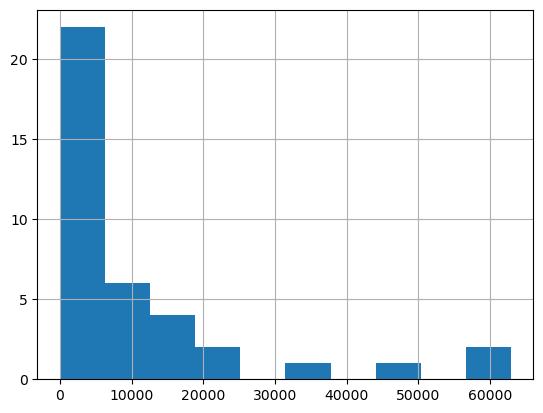

In [23]:
total = len(data)
data['Por_Make'] = 0
for i in data['Make'].unique():
    data.loc[data['Make'] == i,'Por_Make'] = len(data[data['Make'] == i])/total

data['Por_State'] = 0
for i in data['State'].unique():
    data.loc[data['State'] == i,'Por_State'] = len(data[data['State'] == i])/total
    
data.Por_Make.value_counts().hist()

<AxesSubplot:>

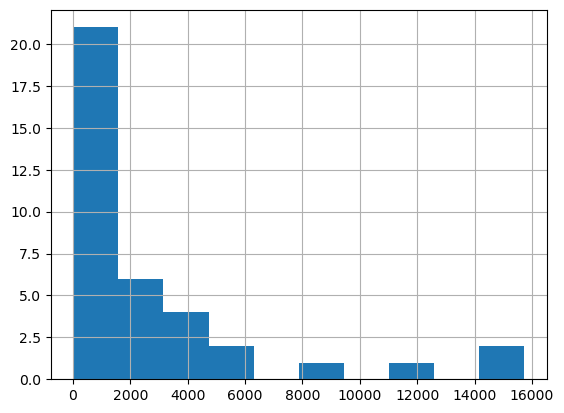

In [24]:
total = len(test)
test['Por_Make'] = 0
for i in test['Make'].unique():
    test.loc[test['Make'] == i,'Por_Make'] = len(test[test['Make'] == i])/total

test['Por_State'] = 0
for i in test['State'].unique():
    test.loc[test['State'] == i,'Por_State'] = len(test[test['State'] == i])/total
    
test.Por_Make.value_counts().hist()

<AxesSubplot:>

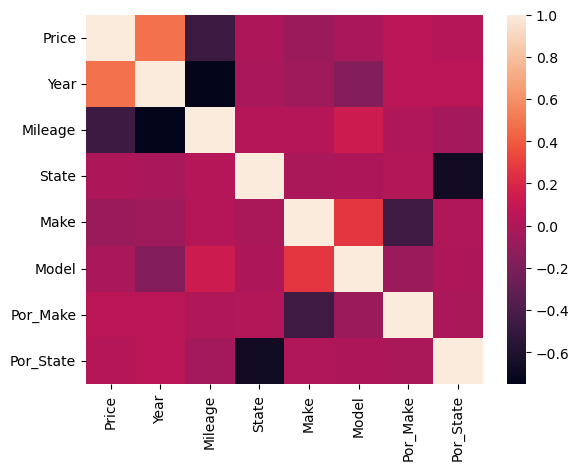

In [25]:
sns.heatmap(data.corr())

In [26]:
# Selección de variables numéricas (X)

X = data.drop(['Price','State','Make','Model'], axis=1)
test = test.drop(['Make','State','Model'], axis=1)

X['YxM'] = X['Year'] * X['Mileage']
test['YxM'] = test['Year'] * test['Mileage']

# Definición variable de interés binaria (y)
y = data['Price']

In [27]:
X

,Year,Mileage,Por_Make,Por_State,YxM
0,2017,9913,0.060922,0.084398,19994521
1,2015,20578,0.145957,0.028410,41464670
2,2012,83716,0.030815,0.114795,168436592
3,2014,28729,0.013535,0.028410,57860206
4,2013,64032,0.060922,0.027187,128896416
...,...,...,...,...,...
399995,2015,25287,0.034160,0.114795,50953305
399996,2015,17677,0.145957,0.013317,35619155
399997,2014,66688,0.012105,0.044825,134309632
399998,2014,37872,0.027775,0.019625,76274208


In [28]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)

In [29]:
# estimator = ElasticNet(alpha=0.0005, l1_ratio= .9, random_state= random_state)

# selector = RFE(estimator, n_features_to_select=20, step=1) #Se define step=1, pero lo puede cambiar para que sea más rápido
# selector = selector.fit(X_train, y_train) # esto puede tardar algunos minutos

# selected_vars = X_train.iloc[:,selector.support_].columns
# selected_vars = ['Year','Mileage','YxM','Por_Make','Por_State']

In [30]:
# X_train = X_train[selected_vars]
# X_test = X_test[selected_vars]
# test = test[selected_vars]

In [31]:
X_train

,Year,Mileage,Por_Make,Por_State,YxM
105079,2013,47857,0.052085,0.044825,96336141
390719,2011,16161,0.114852,0.044825,32499771
80432,2014,30513,0.037643,0.019625,61453182
390536,2015,48226,0.040880,0.020073,97175390
148784,2012,72000,0.157248,0.007820,144864000
...,...,...,...,...,...
316722,2015,43672,0.016977,0.012355,87999080
318904,2010,102222,0.016977,0.006860,205466220
355320,2017,17389,0.040880,0.009260,35073613
292871,2017,42947,0.052085,0.023185,86624099


## Data Standarization

In [32]:
# Escalamiento
X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)
test = MinMaxScaler().fit_transform(test)

In [33]:
models_scores = [] # To store model scores

def rmse(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    return mean_squared_error(y_test, y_pred, squared= False) # squared= False > returns Root Mean Square Error                  

### Hiperparámetros

In [34]:
# reg_decision_model=DecisionTreeRegressor()

# # Hyper parameters range intialization for tuning 
# parameters={"splitter":["best","random"],
#             "max_depth" : [1,3,5,7,9,11,12],
#            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
#            "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
#            "max_features":["auto","log2","sqrt",None],
#            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# # calculating different regression metrics
# from sklearn.model_selection import GridSearchCV
# tuning_model=GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3,verbose=3)

# # function for calculating how much time take for hyperparameter tuning
# def timer(start_time=None):
#     if not start_time:
#         start_time=datetime.now()
#         return start_time
#     elif start_time:
#         thour,temp_sec=divmod((datetime.now()-start_time).total_seconds(),3600)
#         tmin,tsec=divmod(temp_sec,60)
        

# from datetime import datetime
# start_time=timer(None)
# tuning_model.fit(X_train,y_train)
# timer(start_time)

# # best hyperparameters 
# tuning_model.best_params_

# # best model score
# tuning_model.best_score_

In [35]:
# tuning_model.best_params_

### Bagging

In [36]:
# Creación de Metamodelos de Bagging

# Estimador base
regresor = DecisionTreeRegressor(max_depth = 12, max_features = 'sqrt', max_leaf_nodes = None, 
                                 min_samples_leaf = 8, min_weight_fraction_leaf = 0.1, splitter = 'best', random_state= random_state)

n = 200 # Número de modelos

# Modelos bagging para regresión con 30% de muestra
meta_regresor = BaggingRegressor(base_estimator=regresor, n_estimators=n, max_samples=0.30).fit(X_train, y_train)

#RMSE
score = rmse(meta_regresor)
models_scores.append(['BaggingRegressor', score])
print(f'RMSE BaggingRegressor Score = {score}')

RMSE BaggingRegressor Score = 9707.25523944949


### Linear Regression

In [37]:
linear_regression = make_pipeline(LinearRegression())
score = rmse(linear_regression)

models_scores.append(['LinearRegression', score])
print(f'LinearRegression Score= {score}')

LinearRegression Score= 16837.8017602825


### Lasso

In [38]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, random_state= random_state))

score = rmse(lasso)
models_scores.append(['Lasso', score])
print(f'Lasso Score= {score}')

Lasso Score= 11670.439481340563


### Elastic Net

In [39]:
elastic_net = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio= .9, random_state= random_state))

score = rmse(elastic_net)
models_scores.append(['ElasticNet', score])
print(f'ElasticNet Score= {score}')

ElasticNet Score= 11670.552130762582


## Calibración de Hiperparámetros

In [40]:
# # Gradient Boosting
# # Validación empleando k-cross-validation y neg_root_mean_squared_error
# # ==============================================================================
# train_scores = []
# cv_scores    = []

# # Valores evaluados
# estimator_range = range(1, 500, 25)

# # Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# # de entrenamiento y de k-cross-validation.
# for n_estimators in estimator_range:
    
#     modelo = GradientBoostingRegressor(
#                 n_estimators = n_estimators,
#                 loss         = 'ls',
#                 max_features = 'auto',
#                 random_state = 123
#              )
    
#     # Error de train
#     modelo.fit(X_train, y_train)
#     predicciones = modelo.predict(X = X_train)
#     rmse = mean_squared_error(
#             y_true  = y_train,
#             y_pred  = predicciones,
#             squared = False
#            )
#     train_scores.append(rmse)
    
#     # Error de validación cruzada
#     scores = cross_val_score(
#                 estimator = modelo,
#                 X         = X_train,
#                 y         = y_train,
#                 scoring   = 'neg_root_mean_squared_error',
#                 cv        = 5,
#                 n_jobs    = multiprocessing.cpu_count() - 1,
#              )
#     # Se agregan los scores de cross_val_score() y se pasa a positivo
#     cv_scores.append(-1*scores.mean())
    
# # Gráfico con la evolución de los errores
# fig, ax = plt.subplots(figsize=(6, 3.84))
# ax.plot(estimator_range, train_scores, label="train scores")
# ax.plot(estimator_range, cv_scores, label="cv scores")
# ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
#         marker='o', color = "red", label="min score")
# ax.set_ylabel("root_mean_squared_error")
# ax.set_xlabel("n_estimators")
# ax.set_title("Evolución del cv-error vs número árboles")
# plt.legend();
# print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

In [41]:
# # Validación empleando k-cross-validation y neg_root_mean_squared_error
# # ==============================================================================
# resultados = {}

# # Valores evaluados
# learning_rates = [0.001, 0.01, 0.1]
# n_estimators   = [10, 20, 100, 200, 300, 400, 500]


# # Bucle para entrenar un modelo con cada combinacion de  learning_rate y n_estimator 
# # y extraer su error de entrenamiento y k-cross-validation.
# for learning_rate in learning_rates:
#     train_scores = []
#     cv_scores    = []
    
#     for n_estimator in n_estimators:
    
#         modelo = GradientBoostingRegressor(
#                     n_estimators  = n_estimator,
#                     learning_rate = learning_rate,
#                     loss          = 'ls',
#                     max_features  = 'auto',
#                     random_state  = 123
#                  )

#         # Error de train
#         modelo.fit(X_train, y_train)
#         predicciones = modelo.predict(X = X_train)
#         rmse = mean_squared_error(
#                 y_true  = y_train,
#                 y_pred  = predicciones,
#                 squared = False
#                )
#         train_scores.append(rmse)

#         # Error de validación cruzada
#         scores = cross_val_score(
#                     estimator = modelo,
#                     X         = X_train,
#                     y         = y_train,
#                     scoring   = 'neg_root_mean_squared_error',
#                     cv        = 3,
#                     n_jobs    = multiprocessing.cpu_count() - 1
#                  )
#         # Se agregan los scores de cross_val_score() y se pasa a positivo
#         cv_scores.append(-1*scores.mean())
        
#     resultados[learning_rate] = {'train_scores': train_scores, 'cv_scores': cv_scores}

# # Gráfico con la evolución de los errores de entrenamiento
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3.84))

# for key, value in resultados.items():
#     axs[0].plot(n_estimators, value['train_scores'], label=f"Learning rate {key}")
#     axs[0].set_ylabel("root_mean_squared_error")
#     axs[0].set_xlabel("n_estimators")
#     axs[0].set_title("Evolución del train error vs learning rate")
    
#     axs[1].plot(n_estimators, value['cv_scores'], label=f"Learning rate {key}")
#     axs[1].set_ylabel("root_mean_squared_error")
#     axs[1].set_xlabel("n_estimators")
#     axs[1].set_title("Evolución del cv-error vs learning rate")
#     plt.legend();

In [42]:
# # Validación empleando k-cross-validation y neg_root_mean_squared_error
# # ==============================================================================
# train_scores = []
# cv_scores    = []

# # Valores evaluados
# max_depths = [1, 3, 5, 10, 20]

# # Bucle para entrenar un modelo con cada valor de max_depth y extraer su error
# # de entrenamiento y de k-cross-validation.
# for max_depth in max_depths:
    
#     modelo = GradientBoostingRegressor(
#                 n_estimators = 100,
#                 loss         = 'ls',
#                 max_depth    = max_depth,
#                 max_features = 'auto',
#                 random_state = 123
#              )
    
#     # Error de train
#     modelo.fit(X_train, y_train)
#     predicciones = modelo.predict(X = X_train)
#     rmse = mean_squared_error(
#             y_true  = y_train,
#             y_pred  = predicciones,
#             squared = False
#            )
#     train_scores.append(rmse)
    
#     # Error de validación cruzada
#     scores = cross_val_score(
#                 estimator = modelo,
#                 X         = X_train,
#                 y         = y_train,
#                 scoring   = 'neg_root_mean_squared_error',
#                 cv        = 5,
#                 n_jobs    = multiprocessing.cpu_count() - 1
#              )
#     # Se agregan los scores de cross_val_score() y se pasa a positivo
#     cv_scores.append(-1*scores.mean())
    
# # Gráfico con la evolución de los errores
# fig, ax = plt.subplots(figsize=(6, 3.84))
# ax.plot(max_depths, train_scores, label="train scores")
# ax.plot(max_depths, cv_scores, label="cv scores")
# ax.plot(max_depths[np.argmin(cv_scores)], min(cv_scores),
#         marker='o', color = "red", label="min score")
# ax.set_ylabel("root_mean_squared_error")
# ax.set_xlabel("max_depth")
# ax.set_title("Evolución del cv-error vs profundidad árboles")
# plt.legend();
# print(f"Valor óptimo de max_depth: {max_depths[np.argmin(cv_scores)]}")

In [43]:
# XGB Regresor

In [44]:
# LGBM Regresor

### Gradient Boosting

In [45]:
gradient_boosting_regressor= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                   max_depth=3, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   random_state = random_state)

score = rmse(gradient_boosting_regressor)
models_scores.append(['GradientBoostingRegressor', score])
print(f'GradientBoostingRegressor Score= {score}')

GradientBoostingRegressor Score= 8665.818918838202


### XGB Regressor

In [46]:
xgb_regressor= xgb.XGBRegressor(learning_rate=0.05, max_depth=3, 
                              n_estimators=50, verbosity=0,  random_state = random_state)

score = rmse(xgb_regressor)
models_scores.append(['XGBRegressor', score])
print(f'XGBRegressor Score= {score}')

XGBRegressor Score= 9331.363756839877


### LGBM Regressor

In [47]:
lgbm_regressor= lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11,random_state = random_state)

score = rmse(lgbm_regressor)
models_scores.append(['LGBMRegressor', score])
print(f'LGBMRegressor Score= {score}')

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
LGBMRegressor Score= 8632.033788436534


In [48]:
estimators = [ ('lgbm_regressor', lgbm_regressor) , ('GradientBoostingRegressor', gradient_boosting_regressor),('xgb_regressor', xgb_regressor) ]

stack = StackingRegressor(estimators=estimators, final_estimator= lasso, cv= 5, n_jobs= n_jobs, passthrough = True)

stack.fit(X_train, y_train)

pred = stack.predict(X_test)

rmse_val = mean_squared_error(y_test, pred, squared= False) # squared= False > returns Root Mean Square Error    
models_scores.append(['Stacking', rmse_val])
print(f'rmse= {rmse_val}')

rmse= 8657.647228202755


In [49]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
y_pred_test = meta_regresor.predict(test)
y_pred = pd.DataFrame(y_pred_test, index=dataTesting.index, columns=['Price'])
y_pred_test

array([21704.77904299, 28934.18438453, 19877.84483224, ...,
       19805.27768858, 24505.17655706, 17530.33312423])

In [50]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,21704.779043
1,28934.184385
2,19877.844832
3,12187.483242
4,23201.233067


In [51]:
X_test

array([[0.52380952, 0.10051748, 0.02251479, 0.23122655, 0.10056755],
       [0.47619048, 0.05465147, 0.16793869, 0.16486409, 0.05465145],
       [0.80952381, 0.02110728, 0.52763468, 0.26571309, 0.0211809 ],
       ...,
       [0.80952381, 0.04445565, 0.38736246, 0.10951451, 0.0446107 ],
       [0.71428571, 0.05631293, 0.16793869, 0.23122655, 0.05645322],
       [0.85714286, 0.02144208, 0.38736246, 0.23122655, 0.02152755]])

## Microservicios

In [52]:
# Exportar modelo a archivo binario .pkl
joblib.dump(meta_regresor, 'C:/Users/ElkinDavidPeñaRuiz/OneDrive - CARBOMAX DE COLOMBIA S.A.S/PERSONALES/MIAD/CICLO 4/Machine Learning y PLN/MIAD_UNIANDES/model/car_price_reg.pkl', compress=3)

['C:/Users/ElkinDavidPeñaRuiz/OneDrive - CARBOMAX DE COLOMBIA S.A.S/PERSONALES/MIAD/CICLO 4/Machine Learning y PLN/MIAD_UNIANDES/model/car_price_reg.pkl']

In [53]:
# # Importar modelo y predicción
# from model.model_deployment import predict

# # Predicción
# predict(2017,9913)

# Disponibilizar modelo con Flask

In [54]:
# # Importación librerías
# from flask import Flask
# from flask_restx import Api, Resource, fields

In [55]:
# # Definición aplicación Flask
# app = Flask(__name__)

# # Definición API Flask
# api = Api(
#     app, 
#     version='1.0', 
#     title='Car Price Prediction API',
#     description='Car Price Prediction API')

# ns = api.namespace('predict', 
#      description='Car Price Regression')

# # Definición argumentos o parámetros de la API
# parser = api.parser()
# # 	Year	Mileage	State	Make
# parser.add_argument(
#     'YEAR', 
#     type=int, 
#     required=True, 
#     help='Año de Fabricación', 
#     location='args')

# parser.add_argument(
#     'MILEAGE', 
#     type=int, 
#     required=True, 
#     help='Kilometraje', 
#     location='args')

# resource_fields = api.model('Resource', {
#     'result': fields.String,
# })

In [56]:
# # Definición de la clase para disponibilización
# @ns.route('/')
# class CarPriceApi(Resource):

#     @api.doc(parser=parser)
#     @api.marshal_with(resource_fields)
#     def get(self):
#         args = parser.parse_args()
        
#         return {
#          "result": predict(args['YEAR'],args['MILEAGE'])
#         }, 200

In [57]:
# # Ejecución de la aplicación que disponibiliza el modelo de manera local en el puerto 5000
# app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)